In [ ]:
!apt-get update
!apt-get install --allow-downgrades nvidia-driver-470

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [830 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,077 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,037 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://security.ubun

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [1]:
!pip install face_recognition

<IPython.core.display.Javascript object>

Enter the name: LAIBA
Saved to photo.jpg


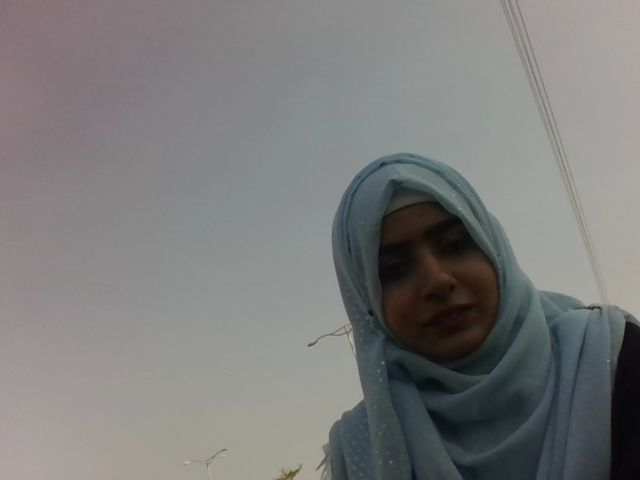

Marking attendance for: LAIBA
Data to be saved:
    Name   Filename
0  LAIBA  photo.jpg
name 'os' is not defined


In [4]:
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import pandas as pd

# Define function to mark attendance
def markAttendance(name, filename):
    print("Marking attendance for:", name)
    df = pd.DataFrame({'Name': [name], 'Filename': [filename]})
    print("Data to be saved:")
    print(df)
    if os.path.exists('/content/drive/My Drive/Attendance.xlsx'):
        with pd.ExcelWriter('/content/drive/My Drive/Attendance.xlsx', mode='a', engine='openpyxl') as writer:
            df.to_excel(writer, index=False, header=False)
            print("Data saved successfully.")
    else:
        df.to_excel('/content/drive/My Drive/Attendance.xlsx', index=False)
        print("Excel file created.")

# Define function to capture a single photo from webcam along with name
def take_photo_with_name(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const nameInput = document.createElement('input');
            nameInput.type = 'text';
            nameInput.placeholder = 'Enter Name';
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(nameInput);
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)

    name = input("Enter the name: ")
    return filename, name

# Capture a single photo from the webcam along with the name
try:
    filename, name = take_photo_with_name()
    print('Saved to {}'.format(filename))

    img = cv2.imread(filename)
    if img is not None:
        cv2_imshow(img)
    else:
        print("Failed to read the image.")
    markAttendance(name, filename)

except Exception as err:
    print(str(err))
